# Spatial Problem: In what cities will we be able to see upcoming eclipses?

First we need to import our libraries

In [50]:
%matplotlib inline

import matplotlib.pyplot as plt

import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame

# new imports 
import os
data_pth = "../Data/"

Now to use some of our own data!

In [51]:
# Look in your Data directory to see this shapefile
eclipses = gpd.read_file(os.path.join(data_pth, "Eclipses.shp"))

In [52]:
eclipses

,Year,FolderPath,geometry
0,2017,TSE 2017.08.21/TSE 2017 August 21 Umbral Path,"POLYGON Z ((-171.57693 39.73810000000003 0, -1..."
1,2019,TSE 2019.07.02/TSE 2019 July 02 Umbral Path,"POLYGON Z ((-160.39845 -37.64846999999997 0, -..."
2,2020,TSE 2020.12.14/TSE 2020 December 14 Umbral Path,"POLYGON Z ((-132.81568 -7.773699999999963 0, -..."
3,2021,TSE 2021.12.04/TSE 2021 December 04 Umbral Path,POLYGON Z ((-51.18286999999998 -53.08708999999...
4,2023,HSE 2023.04.20/HSE 2023 April 20 Umbral Path,POLYGON Z ((180.0000000000001 3.21677000000005...
5,2024,TSE 2024.04.08/TSE 2024 April 08 Umbral Path,"POLYGON Z ((-158.5096 -7.820039999999949 0, -1..."
6,2026,TSE 2026.08.12/TSE 2026 August 12 Umbral Path,POLYGON Z ((113.4735000000001 75.0838800000000...
7,2027,TSE 2027.08.02/TSE 2027 August 02 Umbral Path,POLYGON Z ((-44.46105999999997 27.958530000000...
8,2028,TSE 2028.07.22/TSE 2028 July 22 Umbral Path,POLYGON Z ((75.66460000000018 -18.383469999999...
9,2030,TSE 2030.11.25/TSE 2030 November 25 Umbral Path,POLYGON Z ((1.61298000000005 -16.2127899999999...


In [53]:
# view it differently by transposing rows and columns
eclipses.head().T

,0,1,2,3,4
Year,2017,2019,2020,2021,2023
FolderPath,TSE 2017.08.21/TSE 2017 August 21 Umbral Path,TSE 2019.07.02/TSE 2019 July 02 Umbral Path,TSE 2020.12.14/TSE 2020 December 14 Umbral Path,TSE 2021.12.04/TSE 2021 December 04 Umbral Path,HSE 2023.04.20/HSE 2023 April 20 Umbral Path
geometry,"POLYGON Z ((-171.57693 39.73810000000003 0, -1...","POLYGON Z ((-160.39845 -37.64846999999997 0, -...","POLYGON Z ((-132.81568 -7.773699999999963 0, -...",POLYGON Z ((-51.18286999999998 -53.08708999999...,POLYGON Z ((180.0000000000001 3.21677000000005...


In [54]:
# Check the coordinate reference system of our data, its crs
eclipses.crs

{'init': 'epsg:4326'}

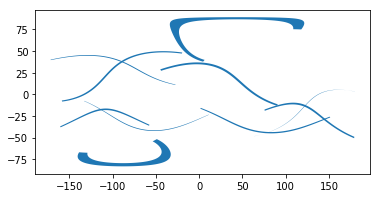

In [55]:
# Now we plot
eclipses.plot()

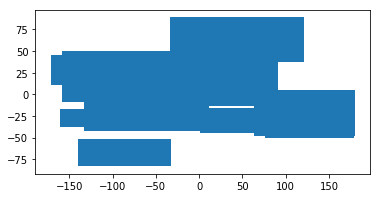

In [56]:
# Examine what the envelope of our data looks like
eclipses.envelope.plot()

In [57]:
# We can examine number of shapes/records for each year
eclipses['Year'].value_counts()

2030    1
2028    1
2027    1
2026    1
2024    1
2023    1
2021    1
2020    1
2019    1
2017    1
Name: Year, dtype: int64

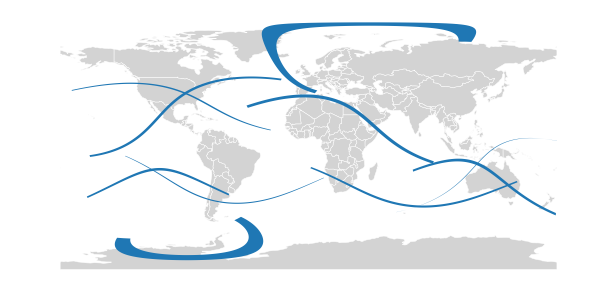

In [58]:
# Where exactly are these paths? Let's add our basemap to make this clear.
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))
# Pass ax=ax to the second layer
eclipses.plot(ax=ax)
# There is an axis by default. You can see it if you comment out the below.
ax.set_axis_off()

In [59]:
# Let's load in the cities provided by geopandas. Note these are just the capitals.
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

(-197.99999999999994, 198.00000000000014, -98.95351100000003, 98.0237310000001)

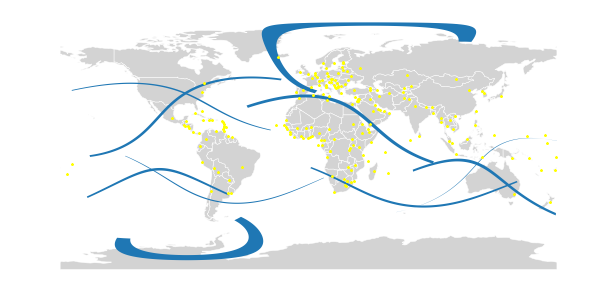

In [60]:
# Now we'll plot our basemap, our eclipse paths, and our cities
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))
eclipses.plot(ax=ax)
cities.plot(marker='*', color='yellow', markersize=5, ax=ax)
ax.axis('off')

In [61]:
# But we want MORE cities, so let's use our own. This is a local shapefile in your data directory.
cities = gpd.read_file(os.path.join(data_pth, "ne_10m_populated_places.shp"))

In [62]:
cities.head().head()

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,DIFFASCII,NAMEASCII,ADM0CAP,...,wof_id,CAPALT,NAME_EN,NAME_DE,NAME_ES,NAME_FR,NAME_PT,NAME_RU,NAME_ZH,geometry
0,10,1,8,Admin-1 capital,Colonia del Sacramento,None,None,0,Colonia del Sacramento,0.0,...,421199749,NaN,Colonia del Sacramento,Colonia del Sacramento,Colonia del Sacramento,Colonia del Sacramento,Colônia do Sacramento,Колония-дель-Сакраменто,科洛尼亞德爾薩克拉門托,POINT (-57.84000247340134 -34.47999900541754)
1,10,1,8,Admin-1 capital,Trinidad,None,None,0,Trinidad,0.0,...,890444639,NaN,Trinidad,Trinidad,Trinidad,Trinidad,Trinidad,Тринидад,特立尼達,POINT (-56.90099656015872 -33.5439989373607)
2,10,1,8,Admin-1 capital,Fray Bentos,None,None,0,Fray Bentos,0.0,...,890451703,NaN,Fray Bentos,Fray Bentos,Fray Bentos,Fray Bentos,Fray Bentos,Фрай-Бентос,弗賴本托斯,POINT (-58.3039974719095 -33.1389990288435)
3,10,1,8,Admin-1 capital,Canelones,None,None,0,Canelones,0.0,...,890444649,NaN,Canelones,Canelones,Canelones,Canelones,Canelones,Канелонес,卡內洛內斯,POINT (-56.28400149324307 -34.53800400667546)
4,10,1,8,Admin-1 capital,Florida,None,None,0,Florida,0.0,...,890431207,NaN,Florida,Florida,Florida,Florida,Florida,Флорида,佛羅里達,POINT (-56.21499844799416 -34.09900200521719)


In [63]:
# Check the crs of our new cities data
cities.crs

{'init': 'epsg:4326'}

In [64]:
# Is the cities data still in the same crs as the eclipse data? Let's check.
eclipses.crs == cities.crs

True

(-198.38630091388424, 198.17962561808534, -99.64179619362255, 98.0565064854107)

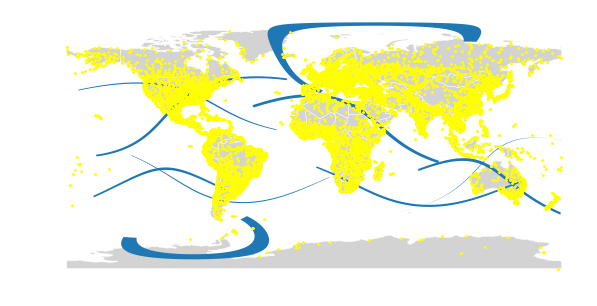

In [65]:
# Great. Let's plot it all again
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))
eclipses.plot(ax=ax)
cities.plot(marker='*', color='yellow', markersize=5, ax=ax)
ax.axis('off')

(-198.38630091388424, 198.17962561808534, -99.64179619362255, 98.0565064854107)

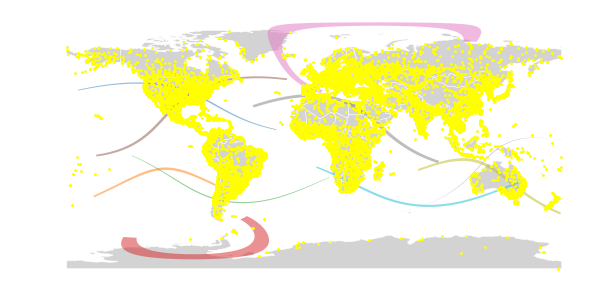

In [66]:
# Let's change our eclipse colors and transparency
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))
eclipses.plot(ax=ax, cmap='tab10', alpha=0.5)
cities.plot(marker='*', color='yellow', markersize=5, ax=ax)
ax.axis('off')

In [67]:
# We just want to focus on a single eclipse path for our analysis. We will select one by year.
eclipses['Year']

0    2017
1    2019
2    2020
3    2021
4    2023
5    2024
6    2026
7    2027
8    2028
9    2030
Name: Year, dtype: int64

(-197.99999999999994, 198.00000000000014, -98.95351100000003, 98.0237310000001)

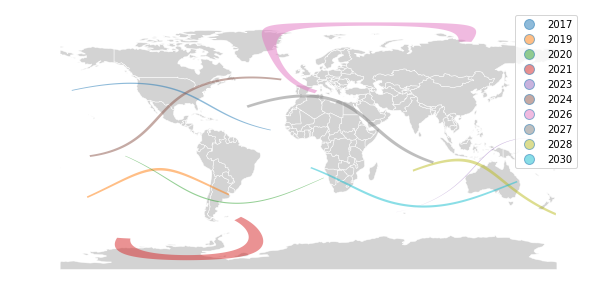

In [68]:
# But how do we know which is which?
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))

# We added categorical, column, and legend properties
eclipses.plot(ax=ax, cmap='tab10', categorical=True, alpha=0.5, column = "Year", legend=True)
ax.axis('off')

## Are any eclipses passing over Cleveland?

In [69]:
from geopandas.tools import sjoin
allecities = gpd.sjoin(cities, eclipses, how='inner', op='intersects')

In [70]:
cleveland = cities.loc[cities['NAME'] == 'Cleveland']
cleveland

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,DIFFASCII,NAMEASCII,ADM0CAP,...,wof_id,CAPALT,NAME_EN,NAME_DE,NAME_ES,NAME_FR,NAME_PT,NAME_RU,NAME_ZH,geometry
index_left,,,,,,,,,,,,,,,,,,,,,
6793,3,110,1,Populated place,Cleveland,None,None,0,Cleveland,0.0,...,101712563,NaN,Cleveland,Cleveland,Cleveland,Cleveland,Cleveland,Кливленд,克里夫蘭,POINT (-81.69694406998963 41.47193265371732)


In [71]:
ecleve = gpd.sjoin(cleveland, eclipses, how='inner', op='intersects')

if len(ecleve) > 0:
    print('{} eclipse(s) will pass through Cleveland'.format(len(ecleve)))
    print('Year(s):')
    for y in ecleve['Year']:
        print(y)
else:
    print('No eclipses passing through Cleveland')

1 eclipse(s) will pass through Cleveland
Year(s):
2024


In [72]:
# TEST if this line will only work if there is only one eclipse
cleveland_eclipse = eclipses.loc[eclipses['Year'] == int(ecleve['Year'])]

(-13.450309999999945, 54.82445000000007)

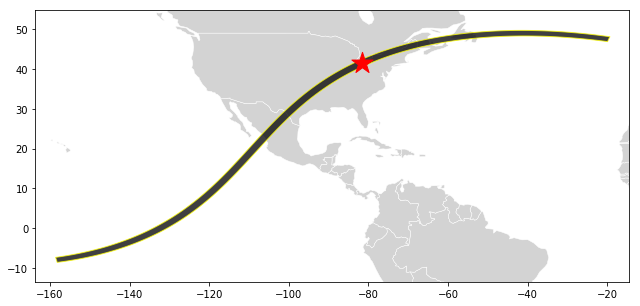

In [73]:
# plot it!
ax = world.plot(color='lightgray', linewidth=0.5, edgecolor='white', figsize=(15,5))
cleveland_eclipse.plot(ax=ax, color='black', edgecolor='yellow', alpha=0.75)
cleveland.plot(marker='*', color='red', markersize=500, ax=ax)
bounds = cleveland_eclipse.geometry.bounds
plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5])

In [74]:
## TO DO
# How many will pass over the city where you live?

## Which eclipses will cover the largest population?

In [75]:
allecities.T.head()

,12,13,15,454,455,457,519,520,793,795,...,6736,7286,7312,7318,7331,7334,3344,5561,4855,4856
SCALERANK,10,10,10,10,10,10,9,9,8,8,...,4,0,6,4,8,8,7,6,7,7
NATSCALE,1,1,1,1,1,1,5,5,10,10,...,50,600,30,50,10,10,20,30,20,20
LABELRANK,7,7,7,5,5,5,6,6,3,3,...,3,3,8,8,8,8,1,3,0,0
FEATURECLA,Admin-1 capital,Admin-1 capital,Admin-1 capital,Admin-1 capital,Admin-1 capital,Admin-1 capital,Admin-1 capital,Admin-1 capital,Populated place,Populated place,...,Populated place,Admin-1 capital,Populated place,Admin-1 capital,Populated place,Populated place,Populated place,Populated place,Scientific station,Scientific station
NAME,Kasserine,Sdid Bouzid,Mahdia,Bordj Bou Arréridj,M'sila,Oum el Bouaghi,'Ataq,Marib,Marbella,Algeciras,...,Dubbo,Sydney,Queenstown,Dunedin,Te Anau,Wanaka,Biak,Exmouth,Orcadas Station,Signy Research Station


### Robin: I'm trying to find out the populations covered by each eclipse, then style them in a plot based on that

In [76]:
allecities = pd.DataFrame(allecities[['POP_MAX', 'Year']])

In [77]:
allecities.head()

,POP_MAX,Year
12,76243,2027
13,42098,2027
15,45977,2027
454,140000,2027
455,150000,2027


In [78]:
eclipsepop = allecities.dissolve(by='Year', aggfunc='sum')

AttributeError: 'DataFrame' object has no attribute 'dissolve'

In [ ]:
eclipsepop['POP_MAX']

In [ ]:
eclipsepop.plot()

In [ ]:
list(eclipsepop.index)

In [ ]:
eclipses.head()

In [ ]:
print(eclipses.head())
print(eclipsepop.head())

In [ ]:
# PROBLEM
#eclipses = eclipses.join(eclipsepop, on='Year')
#allecities = gpd.sjoin(cities, eclipses, how='inner', op='intersects')
#eclipses = eclipses.join(cities, eclipses, how='left', on=['Year', 'geometry'])
pop_eclipses = pd.merge(eclipses, eclipsepop, how='left', on=['Year'])

## Which Eclipse Do You Want to Map?

In [ ]:
# I'll pick the one from 2017, it was on my birthday after all.
myeclipse = eclipses[(eclipses['Year'] == 2017)]

In [ ]:
# Let's plot it 
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))
myeclipse.plot(ax=ax)
cities.plot(marker='*', color='yellow', markersize=5, ax=ax)
ax.axis('off')

In [ ]:
# But I want to zoom in on my chosen eclipse path
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))
myeclipse.plot(ax=ax)
cities.plot(marker='*', color='yellow', markersize=5, ax=ax)
bounds = myeclipse.geometry.bounds

# To do this, you set the bounds to the min/max x/y of your layer
plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5])

In [ ]:
# Let's style the plot so that the eclipse looks eclipse-ier
ax = world.plot(color='lightgray', linewidth=0.5, edgecolor='white', figsize=(15,5))
myeclipse.plot(ax=ax, color='black', edgecolor='yellow', alpha=0.75)
cities.plot(marker='o', color='white', markersize=2, ax=ax)
bounds = myeclipse.geometry.bounds
plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5])

In [ ]:
# Check that the crs are the same for myeclipse and cities
print('data is in the same crs:', myeclipse.crs == cities.crs, ':', myeclipse.crs)

In [ ]:
# We can see that there are a few cities that intersect my path! But we want to know which ones.
# Do a spatial join to get the intersection
from geopandas.tools import sjoin
ecities = gpd.sjoin(cities, myeclipse, how='inner', op='intersects')
ecities.head()

In [ ]:
# Let's plot the results!
ax = world.plot(color='lightgray', linewidth=0.5, edgecolor='white', figsize=(15,5))
myeclipse.plot(ax=ax, color='black', edgecolor='yellow', alpha=0.75)
ecities.plot(marker='o', color='white', markersize=2, ax=ax)
bounds = myeclipse.geometry.bounds
plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5])

In [ ]:
print('Wow! There are {} cities in your path!'.format(len(ecities)))
print()
print(ecities['NAME'])

In [ ]:
print(ecities)

# Make it slippy

In [ ]:
import folium

In [ ]:
# Let's find the centroid of the eclipse we chose, so that we can center our folum map on it
x = myeclipse.centroid.x.values[0]
y = myeclipse.centroid.y.values[0]
print('y: ' + str(y) + ', x: ' + str(x))

# Note: results will vary depending on the eclipse you chose

Let's choose a basemap! There are many options, [check them out](https://deparkes.co.uk/2016/06/10/folium-map-tiles/).

In [ ]:
# Note: no matter what projection you were in before, the folium maps will be in Web Mercator
map_osm = folium.Map(location=[y, x], zoom_start=3)
map_osm

In [ ]:
map_carto = folium.Map(
    location=[y, x],
    tiles='Cartodb Positron',
    zoom_start=3
)
map_carto

In [ ]:
map_stamen = folium.Map(
    location=[y, x],
    tiles='stamenwatercolor',
    zoom_start=3
)
map_stamen

In [ ]:
folium.GeoJson(ecities,name='Eclipse Cities').add_to(map_stamen)
folium.GeoJson(myeclipse,name='Eclipse Path').add_to(map_stamen)

# Add a layer control if you like
folium.LayerControl().add_to(map_stamen)

map_stamen

In [ ]:
# Saving your results as a Esri Shapefile is easy with GeoPandas
# myeclipse.to_file('../Data/myeclipse.shp', driver='ESRI Shapefile')
# ecities.to_file('../Data/ecities.shp', driver='ESRI Shapefile')

To Fix:
* Move legend off the map

To Add:

* Which eclipse is most likely to have clear skies? (may need date and/or season data)
* Find the eclipse that will cover the largest population
* Make popups for points on slippy map